# What to do after MCMC

Plan for today:

-   After MCMC: [diagnostics](#mcmc-diagnostics), [model
    evaluation](#model-evaluation), [results](#Results)

Recap from last week:

**[MCMC](week2.md#MCMC)**: Monte Carlo Integration using Markov Chains

**[Stan](week2.md#Stan)**: A probabilistic programming framework

# MCMC diagnostics

Overall aim: do my samples really come from my target probability
distribution?

General rules of thumb:

-   Run plenty of chains
-   Adopt a pessimistic mindset: one bad diagnostic is enough!

## $\hat{R}$

$\hat{R}$ is a number that tells you:

-   Do my chains agree with each other?
-   Are my chains stationary?

$\hat{R}$ should be close to 1. If not, you need to change something!

Find out more: Vehtari et al. (2021)

## Divergent transitions

This diagnostic is specific to HMC.

It answers the question *did the trajectory ODE solver fail?*

Usually the reason for the failure is a target distribution with very
varying optimal step sizes.

Sometimes the location of the divergent transitions gives clues about
the reason for the failure.

Find out more: [Betancourt
(2017)](https://betanalpha.github.io/assets/case_studies/divergences_and_bias.html).

# Model evaluation

## Retrospective ‘predictive’ checks

**Predictive distribution**: what a model that can replicate its
measurements says about those measurements, i.e. $p(y^{rep})$.

It’s very useful to check these things:

-   The prior predictive distribution should not allocate much
    probability mass to replicated measurements that are obviously
    impossible.

-   If any actual measurements lie in a region with low prior predictive
    probability (e.g. if measurement $i$ is too low so that
    $p(y^rep_i>y_i) =
    0.99$), that shows that the prior model is inconsistent with the
    measurements.

-   If there are systematic differences between the posterior predictive
    distribution and the observed measurements, that is a sign that the
    model is inconsistent with the measurements.

Since predictive checking depends on pattern-matching it is often a good
idea to use graphs for it.

## Scoring models with loss functions

**Loss function**: If the observation is $y$ and the model says
$p(y) = z$, how bad is that?

To choose a model, choose a loss function, then try to minimise
estimated expected loss.

> **Important**
>
> Which loss function is best depends on the problem!

To estimate expected loss, make some predictions.

> **Important**
>
> In order to be useful for estimating model performance, predictions
> must be relevant to the evaluation context that matters.
>
> i.e. not from the training data, not from an already-observed sample,
> not from the past, etc…

Find out more: Vehtari and Ojanen (2012)

## Log likelihood

A good default loss function:

$$
loss(y, p(y)) = -\ln{p(y)}
$$

Out of sample log likelihood can often be approximated cheaply: see
Vehtari, Gelman, and Gabry (2017).

Find out more: (Landes and Williamson 2013, sec. 2.3)

# Results

Some useful summary statistics:

| Statistic          | Answers the question                                                  |
|---------------------|---------------------------------------------------|
| Mean               | “What does the model think is the most likely value”                  |
| Standard deviation | “How sure is my model about this?”                                    |
| Quantile n         | “What is x s.t. my model is n% sure that the quantity is at least x?” |

Do I have enough samples? To find out, calculate the [Monte Carlo
standard
error](https://mc-stan.org/docs/reference-manual/effective-sample-size.html#estimation-of-mcmc-standard-error).

> **Important**
>
> Monte Carlo standard error can vary for different statistics relating
> to the same quantity

# Example

We’ll go through some diagnostics using
[arviz](https://python.arviz.org).

Step one is to load some data. Rather than going through a whole
modelling workflow, we’ll just take one of the example MCMC outputs that
arviz provides via the function
[`load_arviz_data`](https://python.arviz.org/en/stable/api/%20generated/arviz.load_arviz_data.html).

This particular MCMC output has to do with measurements of soil
radioactivity in the USA. You can read more about it
[here](https://docs.pymc.io/notebooks/multilevel_modeling.html).

In [1]:
import arviz as az
import numpy as np  # numpy is for numerical programming
import xarray as xr  # xarray is for manipulating n dimensional tables; arviz uses it a lot! 

idata = az.load_arviz_data("radon")
idata

arviz.InferenceData 
 
 
 
 
 
 posterior 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <xarray.Dataset> Size: 4MB
Dimensions: (chain: 4, draw: 500, g_coef: 2, County: 85)
Coordinates:
 * chain (chain) int64 32B 0 1 2 3
 * draw (draw) int64 4kB 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
 * g_coef (g_coef) <U9 72B 'intercept' 'slope'
 * County (County) <U17 6kB 'AITKIN' 'ANOKA' ... 'WRIGHT' 'YELLOW MEDICINE'
Data variables:
 g (chain, draw, g_coef) float64 32kB ...
 za_county (chain, draw, County) float64 1MB ...
 b (chain, draw) float64 16kB ...
 sigma_a (chain, draw) float64 16kB ...
 a (chain, draw, County) float64 1MB ...
 a_county (chain, draw, County) float64 1MB ...
 sigma (chain, draw) float64 16kB ...
Attributes:
 created_at: 2020-07-24T18:15:12.191355
 arviz_version: 0.9.0
 inference_library: pymc3
 inference_library_version: 3.9.2
 sampling_time: 18.096983432769775
 tuning_steps: 1000 xarray.Dataset Dimensions: chain : 4 draw : 500 g_coef : 2 County : 85 Coordinates: (4) chain (chain) int64 0 1 2 3 array([0, 1, 2, 3]) draw (draw) int64 0 1 2 3 4 5 ... 495 496 497 498 499 array([ 0, 1, 2, ..., 497, 498, 499]) g_coef (g_coef) <U9 'intercept' 'slope' array(['intercept', 'slope'], dtype='<U9') County (County) <U17 'AITKIN' ... 'YELLOW MEDICINE' array(['AITKIN', 'ANOKA', 'BECKER', 'BELTRAMI', 'BENTON', 'BIG STONE',
 'BLUE EARTH', 'BROWN', 'CARLTON', 'CARVER', 'CASS', 'CHIPPEWA',
 'CHISAGO', 'CLAY', 'CLEARWATER', 'COOK', 'COTTONWOOD', 'CROW WING',
 'DAKOTA', 'DODGE', 'DOUGLAS', 'FARIBAULT', 'FILLMORE', 'FREEBORN',
 'GOODHUE', 'HENNEPIN', 'HOUSTON', 'HUBBARD', 'ISANTI', 'ITASCA',
 'JACKSON', 'KANABEC', 'KANDIYOHI', 'KITTSON', 'KOOCHICHING',
 'LAC QUI PARLE', 'LAKE', 'LAKE OF THE WOODS', 'LE SUEUR', 'LINCOLN',
 'LYON', 'MAHNOMEN', 'MARSHALL', 'MARTIN', 'MCLEOD', 'MEEKER',
 'MILLE LACS', 'MORRISON', 'MOWER', 'MURRAY', 'NICOLLET', 'NOBLES',
 'NORMAN', 'OLMSTED', 'OTTER TAIL', 'PENNINGTON', 'PINE', 'PIPESTONE',
 'POLK', 'POPE', 'RAMSEY', 'REDWOOD', 'RENVILLE', 'RICE', 'ROCK',
 'ROSEAU', 'SCOTT', 'SHERBURNE', 'SIBLEY', 'ST LOUIS', 'STEARNS',
 'STEELE', 'STEVENS', 'SWIFT', 'TODD', 'TRAVERSE', 'WABASHA', 'WADENA',
 'WASECA', 'WASHINGTON', 'WATONWAN', 'WILKIN', 'WINONA', 'WRIGHT',
 'YELLOW MEDICINE'], dtype='<U17') Data variables: (7) g (chain, draw, g_coef) float64 ... [4000 values with dtype=float64] za_county (chain, draw, County) float64 ... [170000 values with dtype=float64] b (chain, draw) float64 ... [2000 values with dtype=float64] sigma_a (chain, draw) float64 ... [2000 values with dtype=float64] a (chain, draw, County) float64 ... [170000 values with dtype=float64] a_county (chain, draw, County) float64 ... [170000 values with dtype=float64] sigma (chain, draw) float64 ... [2000 values with dtype=float64] Indexes: (4) chain PandasIndex PandasIndex(Index([0, 1, 2, 3], dtype='int64', name='chain')) draw PandasIndex PandasIndex(Index([ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
 ...
 490, 491, 492, 493, 494, 495, 496, 497, 498, 499],
 dtype='int64', name='draw', length=500)) g_coef PandasIndex PandasIndex(Index(['intercept', 'slope'], dtype='object', name='g_coef')) County PandasIndex PandasIndex(Index(['AITKIN', 'ANOKA', 'BECKER', 'BELTRAMI', 'BENTON', 'BIG STONE',
 'BLUE EARTH', 'BROWN', 'CARLTON', 'CARVER', 'CASS', 'CHIPPEWA',
 'CHISAGO', 'CLAY', 'CLEARWATER', 'COOK', 'COTTONWOOD', 'CROW WING',
 'DAKOTA', 'DODGE', 'DOUGLAS', 'FARIBAULT', 'FILLMORE', 'FREEBORN',
 'GOODHUE', 'HENNEPIN', 'HOUSTON', 'HUBBARD', 'ISANTI', 'ITASCA',
 'JACKSON', 'KANABEC', 'KANDIYOHI', 'KITTSON', 'KOOCHICHING',
 'LAC QUI PARLE', 'LAKE', 'LAKE OF THE WOODS', 'LE SUEUR', 'LINCOLN',
 'LYON', 'MAHNOMEN', 'MARSHALL', 'MARTIN', 'MCLEOD', 'MEEKER',
 'MILLE LACS', 'MORRISON', 'MOWER', 'MURRAY', 'NICOLLET', 'NOBLES',
 'NORMAN', 'OLMSTED', 'OTTER TAIL', 'PENNINGTON', 'PINE', 'PIPESTONE',
 'POLK', 'POPE', 'RAMSEY', 'REDWOOD', 'RENVILLE', 'RICE', 'ROCK',
 'ROSEAU', 'SCOTT', 'SHERBURNE', 'SIBLEY', 'ST LOUIS', 'STEARNS',
 'STEELE', 'STEVENS', 'SWIFT', 'TODD', 'TRAVERSE', 'WAB

Arviz provides a data structure called
[`InferenceData`](https://%20python.arviz.org/en/latest/api/inference_data.html)
which it uses for storing MCMC outputs. It’s worth getting to know it:
there is some helpful explanation
[here](https://python.arviz.org/en/latest/schema/schema.html).

At a high level, an `InferenceData` is a container for several xarray
`Dataset` objects called ‘groups’. Each group contains xarray
\[`DataArray`\] (https:// docs.xarray.dev/
en/stable/generated/xarray.DataArray.html) objects called ‘variables’.
Each variable contains a rectangular array of values, plus the shape of
the values (‘dimensions’) and labels for the dimensions (‘coordinates’).

For example, if you click on the dropdown arrows above you will see that
the group `posterior` contains a variable called `a_county` that has
three dimensions called `chain`, `draw` and `County`. There are 85
counties and the first one is labelled `'AITKIN'`.

The function
[`az.summary`](https://python.arviz.org/en/latest/api/generated/arviz.summary.html)
lets us look at some useful summary statistics, including $\hat{R}$,
divergent transitions and MCSE.

The variable `lp`, which you can find in the group `sample_stats` is the
model’s total log probability density. It’s not very meaningful on its
own, but is useful for judging overall convergence. `diverging` counts
the number of divergent transitions.

In [2]:
az.summary(idata.sample_stats, var_names=["lp", "diverging"])

/Users/tedgro/repos/biosustain/bayesian_statistics_for_computational_biology/.venv/lib/python3.12/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)

In this case there were no post-warmup diverging transitions, and the
$\hat{R}$ statistic for the `lp` variable is pretty close to 1: great!

Sometimes it’s useful to summarise individual parameters. This can be
done by pointing `az.summary` at the group where the parameters of
interest live. In this case the group is called `posterior`.

In [3]:
az.summary(idata.posterior, var_names=["sigma", "g"])

Now we can start evaluating the model. First we check to see whether
replicated measurements from the model’s posterior predictive
distribution broadly agree with the observed measurements, using the
arviz function
[`plot_lm`](https://python.arviz.org/en/latest/api/generated/arviz.plot_lm.html#arviz.plot_lm):

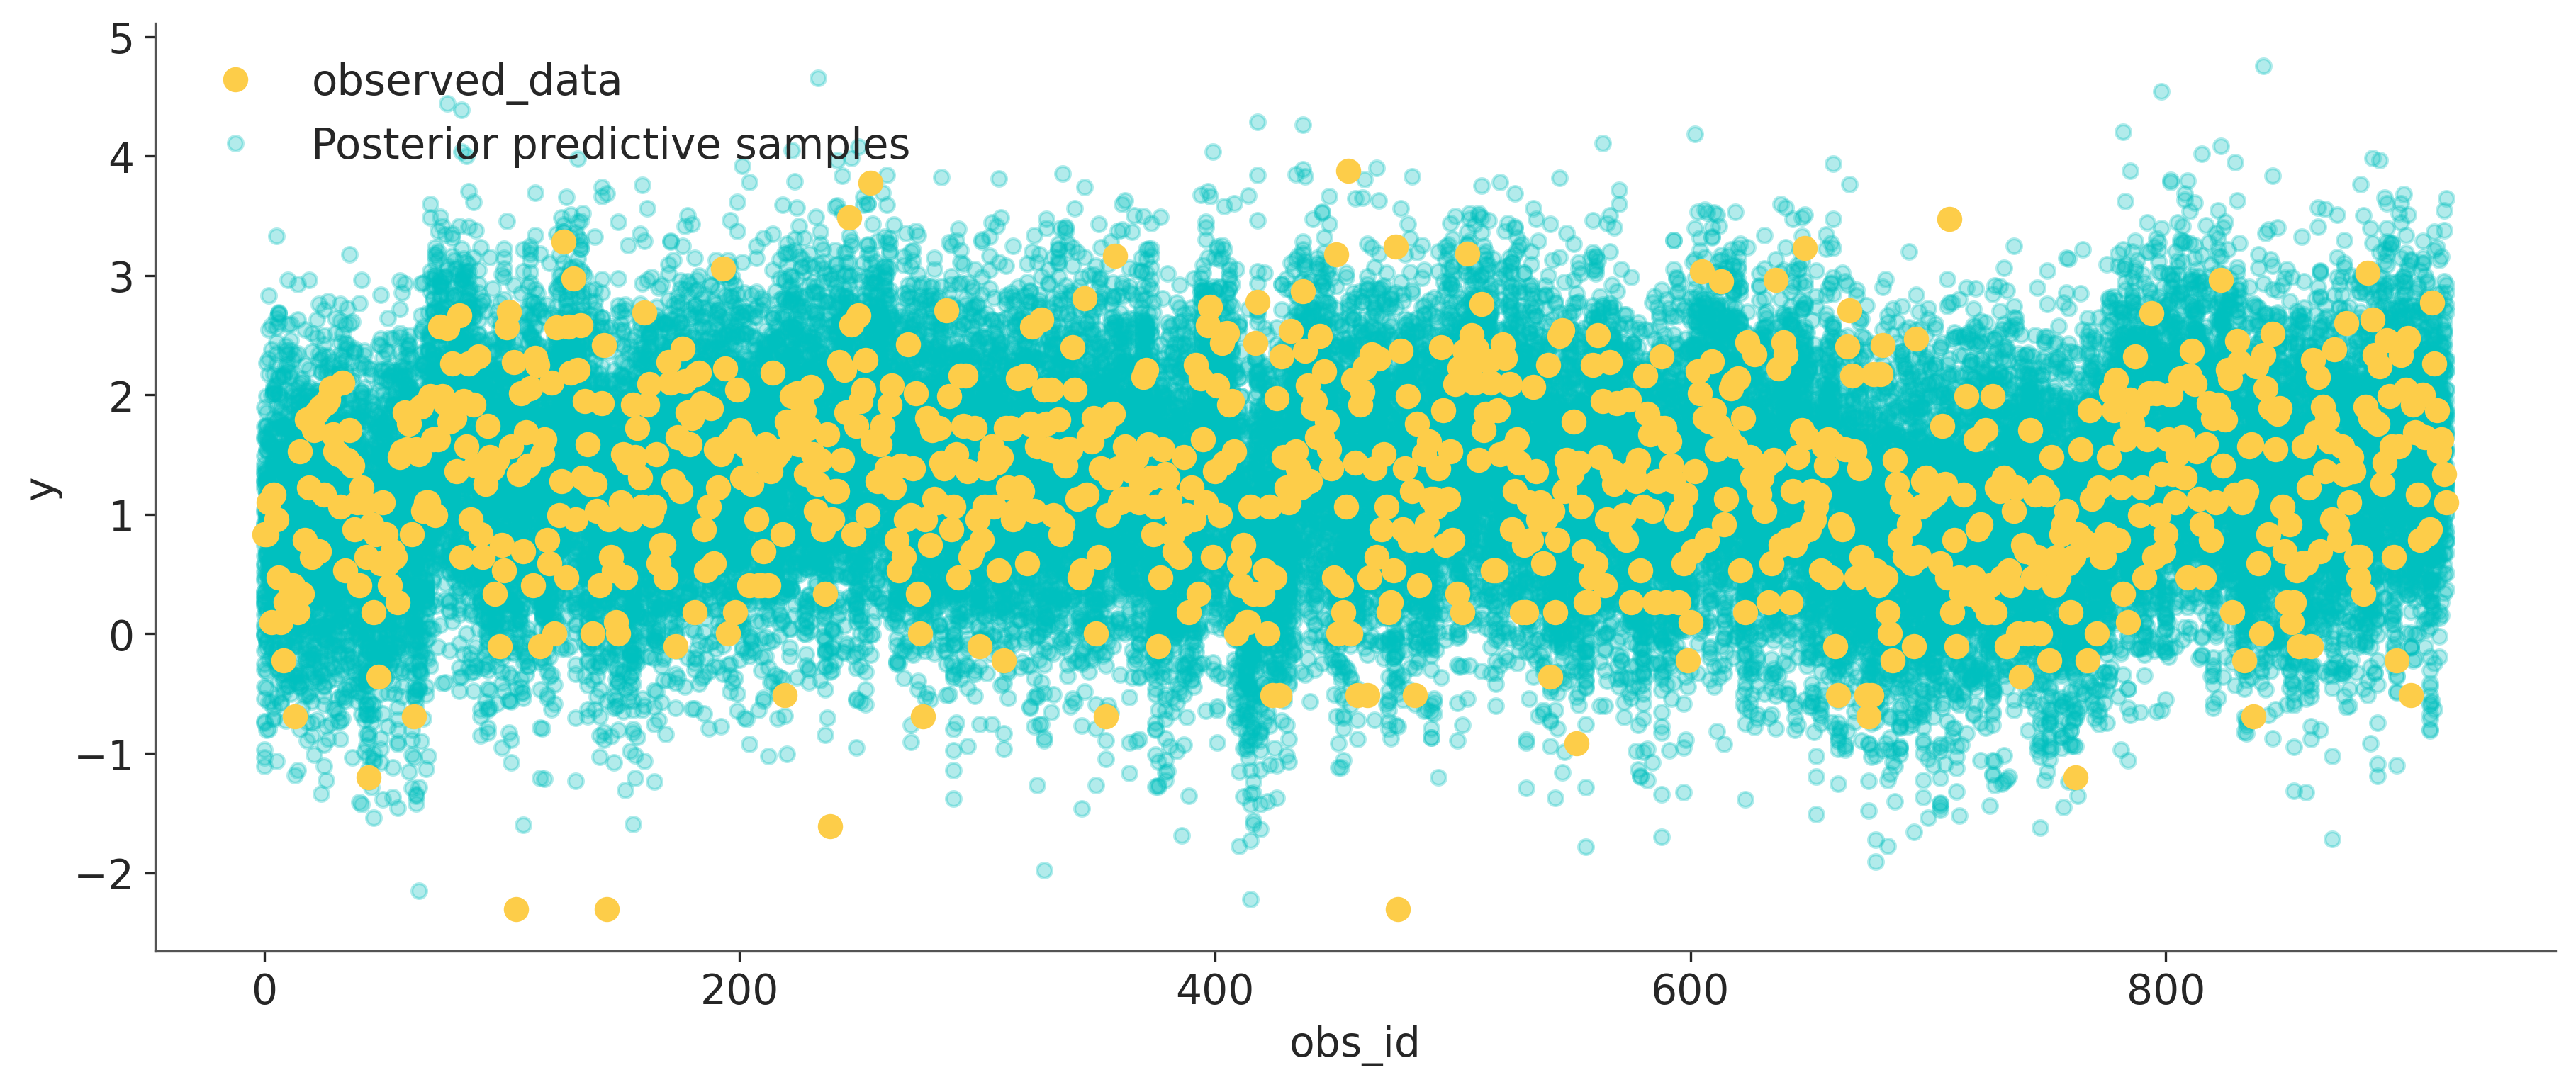

In [4]:
az.style.use("arviz-doc")
az.plot_lm(
    y=idata.observed_data["y"],
    x=idata.observed_data["obs_id"],
    y_hat=idata.posterior_predictive["y"],
    figsize=[12, 5],
    grid=False
);

The function `az.loo` can quickly estimate a model’s out of sample log
likelihood (which we saw above is a nice default loss function),
allowing a nice numerical comparison between models.

Watch out for the `warning` column, which can tell you if the estimation
is likely to be incorrect. It’s usually a good idea to set the
`pointwise` argument to `True`, as this allows for more detailed
analysis at the per-observation level.

In [5]:
az.loo(idata, var_name="y", pointwise=True)

Computed from 2000 posterior samples and 919 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -1027.18    28.85
p_loo       26.82        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)      919  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

The function `az.compare` is useful for comparing different out of
sample log likelihood estimates.

In [6]:
idata.log_likelihood["fake"] = xr.DataArray(
    # generate some fake log likelihoods
    np.random.normal(0, 2, [4, 500, 919]),
    coords=idata.log_likelihood.coords,
    dims=idata.log_likelihood.dims
)
comparison = az.compare(
    {
        "real": az.loo(idata, var_name="y"), 
        "fake": az.loo(idata, var_name="fake")
    }
)
comparison

/Users/tedgro/repos/biosustain/bayesian_statistics_for_computational_biology/.venv/lib/python3.12/site-packages/arviz/stats/stats.py:805: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/tedgro/repos/biosustain/bayesian_statistics_for_computational_biology/.venv/lib/python3.12/site-packages/arviz/stats/stats.py:309: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_comp.loc[val] = (
/Users/tedgro/repos/biosustain/bayesian_statistics_for_computational_biology/.venv/lib

The function
[`az.plot_compare`](https://python.arviz.org/en/latest/api/generated/arviz.plot_compare.html)
shows these results on a nice graph:

/Users/tedgro/repos/biosustain/bayesian_statistics_for_computational_biology/.venv/lib/python3.12/site-packages/arviz/plots/backends/matplotlib/compareplot.py:87: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  scale = comp_df["scale"][0]

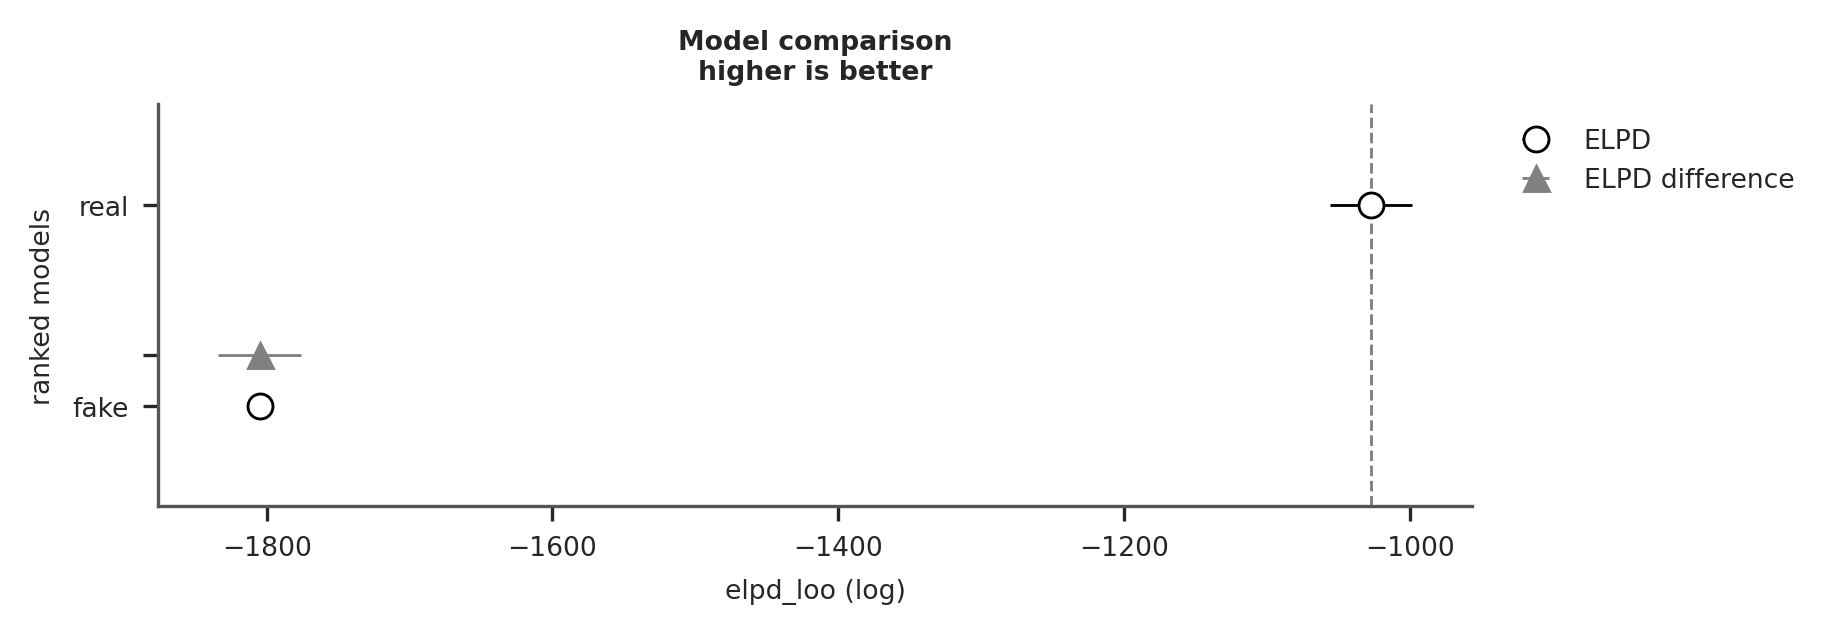

In [7]:
az.plot_compare(comparison);


Betancourt, Michael. 2017. “Diagnosing Biased Inference with
Divergences.” *Betanalpha.github.io*.
<https://github.com/betanalpha/knitr_case_studies/tree/master/divergences_and_bias>.

Landes, Jürgen, and Jon Williamson. 2013. “Objective Bayesianism and the
Maximum Entropy Principle.” *Entropy* 15 (12): 3528–91.
<https://doi.org/10.3390/e15093528>.

Vehtari, Aki, Andrew Gelman, and Jonah Gabry. 2017. “Practical Bayesian
Model Evaluation Using Leave-One-Out Cross-Validation and WAIC.”
*Statistics and Computing* 27 (5): 1413–32.
<https://doi.org/10.1007/s11222-016-9696-4>.

Vehtari, Aki, Andrew Gelman, Daniel Simpson, Bob Carpenter, and
Paul-Christian Bürkner. 2021. “Rank-Normalization, Folding, and
Localization: An Improved R^ for Assessing Convergence of MCMC (with
Discussion).” *Bayesian Analysis* 16 (2): 667–718.
<https://doi.org/10.1214/20-BA1221>.

Vehtari, Aki, and Janne Ojanen. 2012. “A Survey of Bayesian Predictive
Methods for Model Assessment, Selection and Comparison.” *Statistics
Surveys* 6 (none): 142–228. <https://doi.org/10.1214/12-SS102>.